# Data Preprocessing

- Standardization and Mean Removal
- Min/Max scaling features to a range
- Normalization
- Binarization (if applicable)

Machine learning models often assume that the data follows a normal distribution, with zero mean and unit variance

If a feature has variance that is significantly larger than others, it can dominate the objective function and make the estimator unable to learn from other features

Preprocessing aims to remove this problem

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns   
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
import warnings
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


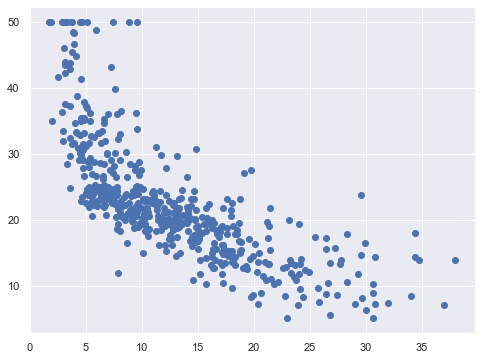

In [10]:
X = boston[['LSTAT']].values
y = boston_dataset.target
plt.figure(figsize=(8,6))
plt.scatter(X, y)

## Without Pre-processing

Text(0, 0.5, 'SSE')

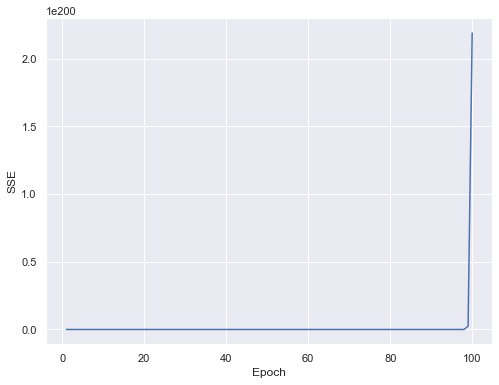

In [23]:
alpha = 0.0001
w = np.zeros(1 + X.shape[1])
cost_ = []
n = 100

for i in range(n):
    y_pred = np.dot(X, w[1:]) + w[0]
    errors = y - y_pred

    w[1:] += alpha * X.T.dot(errors)
    w[0] += alpha * errors.sum()
    cost = (errors**2).sum() / 2
    cost_.append(cost)

plt.figure(figsize=(8,6))
plt.plot(range(1, n + 1), cost_)
# epoch = each cycle for looking at data
plt.xlabel('Epoch')
plt.ylabel('SSE')

Graph is not smooth, need to preprocess data for better result

## With Preprocessing

In [21]:
# scales data to be consistent
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

Text(0, 0.5, 'SSE')

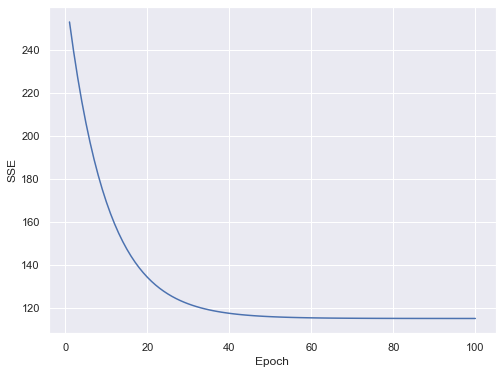

In [22]:
alpha = 0.0001
w = np.zeros(1 + X.shape[1])
cost_ = []
n = 100

for i in range(n):
    y_pred = np.dot(X_std, w[1:]) + w[0]
    errors = y_std - y_pred

    w[1:] += alpha * X_std.T.dot(errors)
    w[0] += alpha * errors.sum()
    cost = (errors**2).sum() / 2
    cost_.append(cost)

plt.figure(figsize=(8,6))
plt.plot(range(1, n + 1), cost_)
# epoch = each cycle for looking at data
plt.xlabel('Epoch')
plt.ylabel('SSE')

## Before Scaling

(-40.0, 40.0)

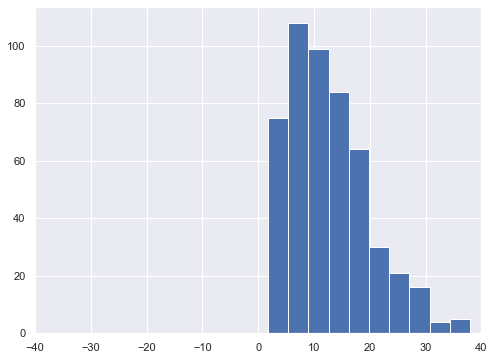

In [24]:
plt.figure(figsize=(8,6))
plt.hist(X)
plt.xlim(-40,40)

## After Scaling

(-4.0, 4.0)

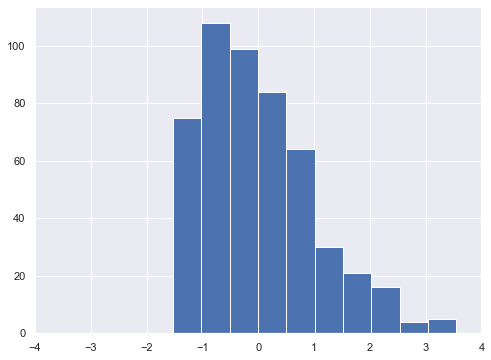

In [26]:
# note new limits and center location
plt.figure(figsize=(8,6))
plt.hist(X_std)
plt.xlim(-4,4)

## Standardization / Mean Removal / Variance Scaling

In [27]:
from sklearn import preprocessing

In [28]:
X_train = np.array([[1, -1, 2],
                    [2, 0, 0],
                    [0, 1, -1]])

In [29]:
# mean of each column 
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

In [32]:
# scale data, mean should now be 0 for each column 
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [33]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

If you scale training data, you must do so with test data as well. But make sure to keep the data split between train/test

In [34]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [36]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [37]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [38]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

(array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 BarContainer objects>)

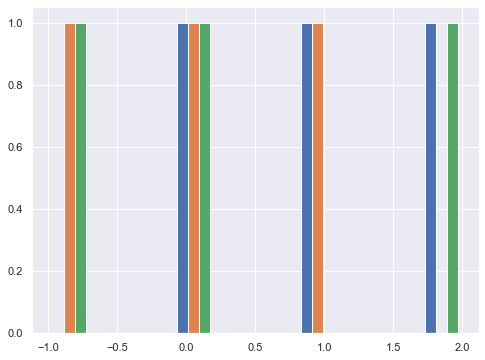

In [39]:
plt.figure(figsize=(8,6))
plt.hist(X_train)

Now we can use ```transform``` on the new dataset

In [40]:
X_test = [[-1, 1, 0]]
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

## Min/Max or Scaling to a Range

Often involves scaling between 0 and 1, or so the maximum absolute value of each feature is scaled to unit size 

This is to decrease standard deviations of features and keep 0 entries in sparse data

In [41]:
X_train = np.array([[1, -1, 2],
                    [2, 0, 0],
                    [0, 1, -1]])

In [48]:
min_max_scaler = preprocessing.MinMaxScaler()

In [49]:
# all training data will be scaled between 0-1
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [50]:
# test data can be above 1 or below 0 since training was used to scale - very large or small values do this
X_test = np.array([[-3,-1,0], [2, 1.5, 4]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

## MaxAbsScaler

Works in a similar fashion, but scales data to ```[-1, 1]``` by dividing thorugh by the largest vlue of each feature, meant for data that is already centered at 0 or sparse data

In [60]:
X_train = np.array([[1, -1, 2],
                    [2, 0, 0],
                    [0, 1, -1]])

In [61]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [63]:
X_test = np.array([[-1,-0.5,2], [0, 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

## Scaling Sparse Data

Centering sparse data would destroy the sparseness structure in the data, rarely makes sense to do

Can make sense to scale sparse inputs, especially if features are on different scales

```MaxAbsScaler``` and ```maxabs_scale``` were designed for sparse data

## Scaling vs Whitening

Sometimes it is not enough to center and scale features independently, since a downstream model can make assumptions of linear independence of the features

Use ```sklearn.decomposition.PCA``` or ```sklearn.decomposition.RandomizedPCA``` with ```whiten=True``` to further remove linear correlation

## Normalization

Process of scaling individual samples to have unit norm

Useful when using quadratic form (dot-product) or any other kernel to quantify the similarity of any pair of samples

Two Types:
- L1 Normalization: Least Absoulte Deviations, ensure the sum of absolute values is 1 in each row
- L2 Normaliation: Least squares, ensure sum of squares is 1

In [67]:
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1, -1]]
X_norm = preprocessing.normalize(X, norm='l1')
X_norm

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [68]:
X_norm2 = preprocessing.normalize(X, norm='l2')
X_norm2

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

Alternatively, the ```preprocessing``` module provides a utility class ```Normalizer``` that implements the same L2 operation using the ```Transformer``` API

In [76]:
normalizer = preprocessing.Normalizer()
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [72]:
normalizer.transform([[-1, 1, 0]])

array([[-0.70710678,  0.70710678,  0.        ]])

## Binarization

Used to get boolean values. Can be useful when using estimators that assume data is distributed according to multi-variate Bernoulli distribution

Common among text processing community to use binary features 

In [77]:
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1, -1]]

binarizer = preprocessing.Binarizer()
binarizer.transform(X)

array([[1, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [79]:
# modify threshold (preset to 0)
binarizer = preprocessing.Binarizer(threshold=1.5)
binarizer.transform(X)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 0]])

## Encoding Categorical Features

In [82]:
source = ['japan', 'usa', 'china', 'india']
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)
print('mapping:')
for k, v in enumerate(label_enc.classes_):
    print(v, '\t', k)

mapping:
china 	 0
india 	 1
japan 	 2
usa 	 3


In [83]:
test_data = ['india', 'usa', 'japan', 'china']
result = label_enc.transform(test_data)
print(result)

[1 3 2 0]


## One Hot / One of K Encoder

- Useful for dealing with sparse matrix
- Uses one-of-k scheme

Process of tuning a series of categorical responses into a binary result

In [84]:
source

['japan', 'usa', 'china', 'india']

In [85]:
src

array([2, 3, 0, 1], dtype=int64)

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)
# matrix indicates prescence of indicator (column) for each entry (row)
# ex: first entry (row 0) is japan (encoded as 2 = column 2)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
